In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
sys.path.append(".") # 为了导入上层目录的d2lzh_pytorch
import d2lzh_pytorch as d2l

transform = transforms.Compose([transforms.ToTensor()])

In [3]:
# mnist_train = torchvision.datasets.FashionMNIST(root='/home/wz209/xy/data/FashionMNIST/raw', train=True, download=True, transform=transform)
# mnist_test = torchvision.datasets.FashionMNIST(root='/home/wz209/xy/data/FashionMNIST/raw', train=False, transform=transform, download=True)
#在ipynb中无法下载,需要在本地下载好，不知道为啥
mnist_train = torchvision.datasets.FashionMNIST(root='./data', download=True,transform=transform,  train=True)
mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [4]:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height X Width

torch.Size([1, 28, 28]) 9


In [5]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(11, 11))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

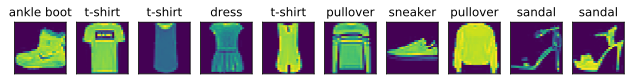

In [7]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [29]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0
else:
    num_workers = 20
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=num_workers)

In [30]:
start = time.time()
for X,y in train_iter:
    continue
print("%.2f sec" % (time.time() - start))

0.86 sec
